In [35]:
import numpy as np
import tensorflow as tf

In [36]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X  

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [37]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [38]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [39]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
	tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
			  optimizer=tf.keras.optimizers.SGD(),
			  metrics=["mae"])

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


2/2 [==============================] - 0s 5ms/step - loss: 19.6294 - mae: 19.6294
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 8.1293 - mae: 8.1293
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1822 - mae: 10.1822
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5365 - mae: 12.5365
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.5868 - mae: 11.5868
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.6878 - mae: 10.6878
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0306 - mae: 9.0306
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5315 - mae: 7.5315
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7186 - mae: 7.7186
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7736 - mae: 11.7736
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3524 

In [40]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# from tensorflow.keras.utils import plot_model

# plot_model(model=model)

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 30.3857 - mae: 30.3857


[30.385677337646484, 30.385677337646484]

In [43]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
     


In [44]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [45]:

# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
     

In [46]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [47]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

split_tables = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits
     
X_train_df, X_test_df = split_tables[0:2]
X_train, X_test, y_train, y_test = [el.to_numpy().astype(np.int32) for el in split_tables]



type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13279.3887 - mae: 13279.3887
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12774.9453 - mae: 12774.9453
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 10550.0078 - mae: 10550.0078
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7538.0835 - mae: 7538.0835
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7376.0908 - mae: 7376.0908
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7331.4990 - mae: 7331.4990
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7271.6206 - mae: 7271.6206
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7215.6157 - mae: 7215.6157
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7157.5088 - mae: 7157.5088
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7097.7974 - mae: 709

In [50]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3197.2148 - mae: 3197.2148


[3197.21484375, 3197.21484375]

<Axes: >

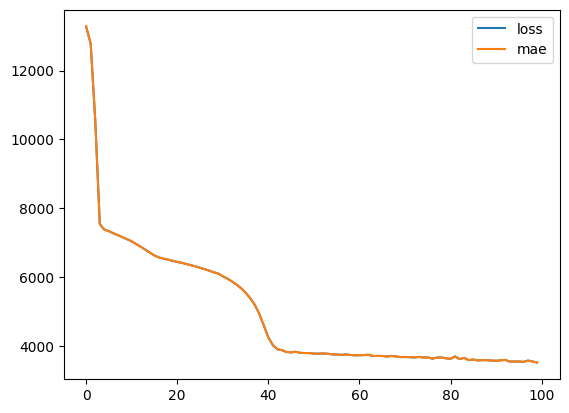

In [51]:
pd.DataFrame(history.history).plot()

In [57]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train_df)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train_df)
X_test_normal = ct.transform(X_test_df)
     
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13343.2412 - mae: 13343.2412
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13318.2148 - mae: 13318.2148
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13166.5020 - mae: 13166.5020
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12528.3115 - mae: 12528.3115
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10727.4629 - mae: 10727.4629
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8507.8955 - mae: 8507.8955
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7896.4946 - mae: 7896.4946
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7739.8643 - mae: 7739.8643
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.9897 - mae: 7586.9897
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7424.6113 - mae:

In [59]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.2639 - mae: 3161.2639


[3161.263916015625, 3161.263916015625]